In [1]:
!pip install diffusers
!pip install transformers
!pip install torch
!pip install streamlit
!pip install --upgrade jax jaxlib  # jax 라이브러리 업데이트


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 8.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manyl

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

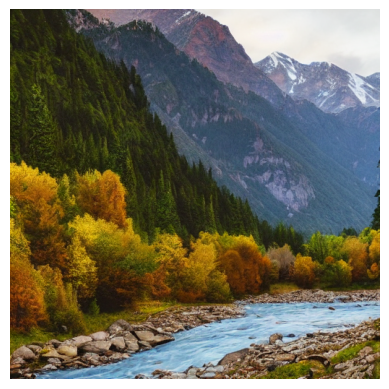

In [2]:
from diffusers import StableDiffusionPipeline
import torch
from PIL import Image
import matplotlib.pyplot as plt

# 'runwayml/stable-diffusion-v1-5' 모델 사용
model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")  # GPU 사용 설정

# 텍스트 프롬프트를 사용하여 이미지 생성 (GPU에서 실행)
prompt = "a scenic landscape with mountains and a river"
image = pipe(prompt).images[0]

# 생성된 이미지 확인
plt.imshow(image)
plt.axis('off')
plt.show()


In [6]:
# app.py 파일 생성
with open('app.py', 'w') as f:
    f.write("""
import streamlit as st
from diffusers import StableDiffusionPipeline
import torch
from PIL import Image

# 'runwayml/stable-diffusion-v1-5' 모델 사용
model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")  # GPU 사용 설정

st.title("Generative AI Image Generator")
prompt = st.text_input("Enter a prompt to generate an image")

if st.button("Generate Image"):
    if prompt:
        with st.spinner("Generating image..."):
            image = pipe(prompt).images[0]
            st.image(image, caption=prompt)
    else:
        st.warning("Please enter a prompt.")
    """)




In [13]:
from pyngrok import ngrok

# ngrok auth token을 실제 값으로 교체
ngrok.set_auth_token('2jhSOQPWGas11eFKGnzoL3ZFvfv_3u9j3sZoankdDXJR7D489')

In [15]:
# ngrok을 통해 Streamlit 서버 포트에 접근
public_url = ngrok.connect(8501)
print(f"Streamlit app is live at: {public_url}")


Streamlit app is live at: NgrokTunnel: "https://1731-34-125-60-159.ngrok-free.app" -> "http://localhost:8501"


In [16]:
# Streamlit 애플리케이션을 백그라운드에서 실행
!streamlit run app.py &




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8502
  Network URL: http://172.28.0.12:8502
  External URL: http://34.125.60.159:8502

  Stopping...


In [ ]:
# Streamlit 애플리케이션 코드 작성
with open('app.py', 'w') as f:
    f.write("""
import streamlit as st
from diffusers import StableDiffusionPipeline
import torch

st.title("Generative AI Image Generator")
prompt = st.text_input("Enter a prompt to generate an image")

if st.button("Generate Image"):
    if prompt:
        # Stable Diffusion 모델 로드
        model_id = "runwayml/stable-diffusion-v1-5"
        pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
        pipe = pipe.to("cuda")  # GPU 사용 설정

        # 이미지 생성
        with st.spinner("Generating image..."):
            image = pipe(prompt).images[0]
            st.image(image, caption=prompt)
    else:
        st.warning("Please enter a prompt.")
    """)

# Streamlit 서버를 백그라운드에서 실행
!streamlit run app.py &

from pyngrok import ngrok

# ngrok auth token 설정 (본인의 ngrok 토큰으로 교체)
ngrok.set_auth_token('2jhSOQPWGas11eFKGnzoL3ZFvfv_3u9j3sZoankdDXJR7D489')

# ngrok을 통해 Streamlit 서버 포트에 접근
public_url = ngrok.connect(8501)
print(f"Streamlit app is live at: {public_url}")





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.60.159:8501

2024-07-24 16:28:08.848420: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-24 16:28:08.848482: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-24 16:28:08.855010: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-24 16:28:10.103433: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Loading pipeline components...: 100% 7/7 [00:14<00:00,  2.02s/it]